In [95]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [96]:
drugs = pd.read_csv('drug200.csv')

In [129]:
drugs['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [97]:
# Ver los primeros datos y los tipos de cada columna
print(drugs.head())
print("Tipos de datos en el dataset:")
print(drugs.dtypes)

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY
Tipos de datos en el dataset:
Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object


In [98]:
# Describir las variables categóricas
categorical_columns = ['Sex', 'BP', 'Cholesterol']  # Lista de columnas categóricas conocidas
for col in categorical_columns:
    print(f"\nFrecuencia de valores en la columna '{col}':")
    print(drugs[col].value_counts())


Frecuencia de valores en la columna 'Sex':
Sex
M    104
F     96
Name: count, dtype: int64

Frecuencia de valores en la columna 'BP':
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

Frecuencia de valores en la columna 'Cholesterol':
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64


In [99]:
# Verificar si hay valores faltantes en las columnas
print("\nValores faltantes por columna:")
print(drugs.isnull().sum())


Valores faltantes por columna:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


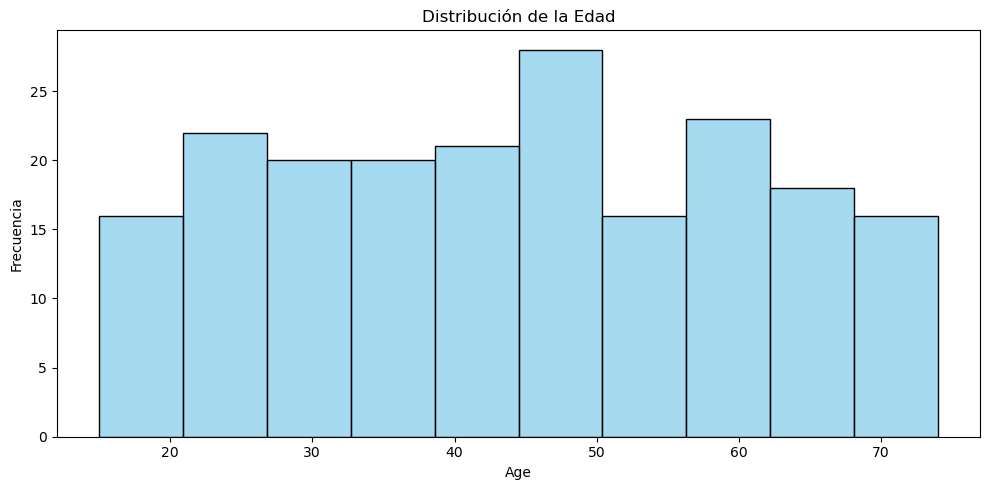

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


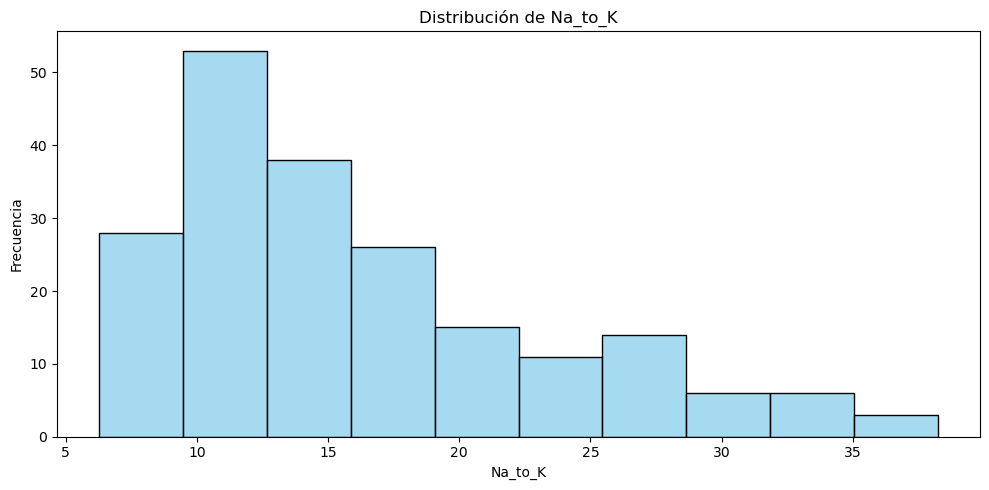

In [100]:
# Visualizar histograma para la variable 'Age' con Seaborn (sin kde)
plt.figure(figsize=(10, 5))
sns.histplot(drugs['Age'], bins=10, color='skyblue', kde=False)
plt.title("Distribución de la Edad")
plt.xlabel("Age")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Visualizar histograma para la variable 'Na_to_K' con Seaborn (sin kde)
plt.figure(figsize=(10, 5))
sns.histplot(drugs['Na_to_K'], bins=10, color='skyblue', kde=False)
plt.title("Distribución de Na_to_K")
plt.xlabel("Na_to_K")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

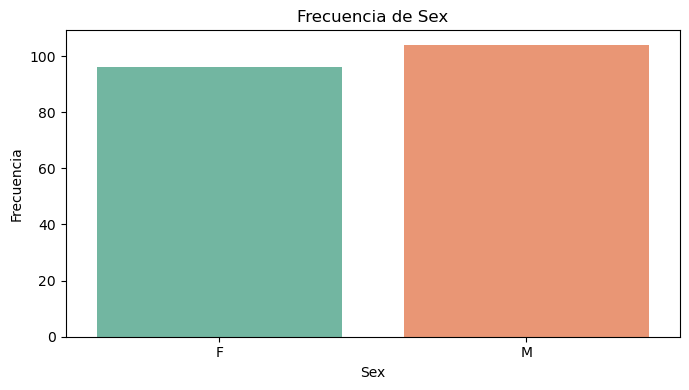

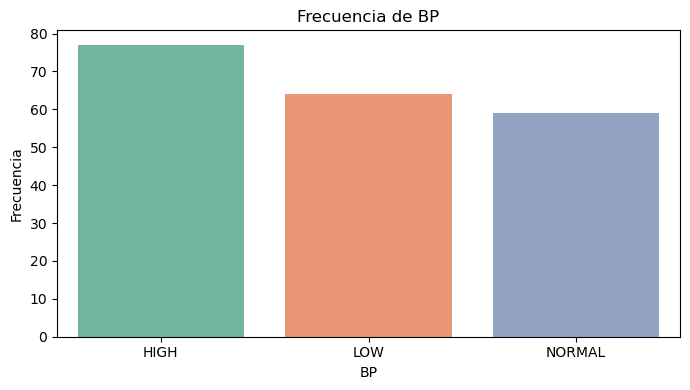

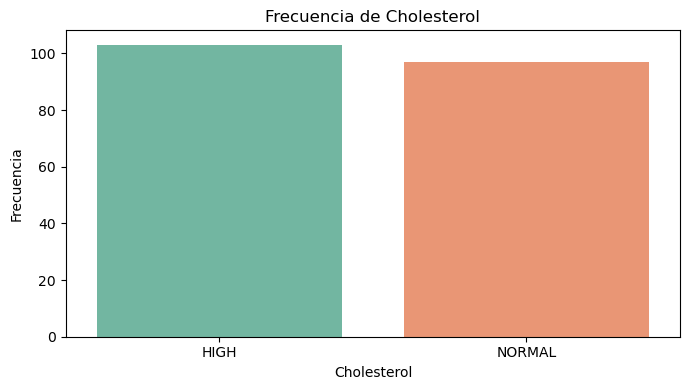

In [101]:
# Visualizar gráficos de barras para las variables categóricas
for col in categorical_columns:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=drugs[col], palette='Set2')
    plt.title(f"Frecuencia de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

In [102]:
# Separar características (X) y target (y)
X = drugs.drop('Drug', axis=1)
y = drugs['Drug']

# Definir las columnas categóricas y numéricas
categorical_columns = ['Sex', 'BP', 'Cholesterol']
numerical_columns = ['Age', 'Na_to_K']

# Separar en Train (80%) y Test (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separar Train en Train (70%) y Validation (30%)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

# Preprocesamiento de las columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# Preprocesar los datos
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

# Ahora tienes los conjuntos separados:
# - X_train, y_train: para entrenar los modelos
# - X_val, y_val: para evaluar los modelos con una configuración básica
# - X_test, y_test: para la evaluación final después de refinar los modelos

In [103]:
# Inicializar modelos con configuraciones básicas
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)

# Entrenar los modelos
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Obtener probabilidades de predicción para el conjunto de validación
rf_probabilities = rf_model.predict_proba(X_val)
lr_probabilities = lr_model.predict_proba(X_val)

# Mostrar las probabilidades para la primera observación en el conjunto de validación
print("Probabilidades predichas por Random Forest para la primera observación:", rf_probabilities[0])
print("Probabilidades predichas por Logistic Regression para la primera observación:", lr_probabilities[0])

# Seleccionar la clase con mayor probabilidad
rf_predictions = rf_model.predict(X_val)  # Selecciona automáticamente la clase con mayor probabilidad
lr_predictions = lr_model.predict(X_val)


print(rf_model.get_params())
print(lr_model.get_params())
# Comparar las predicciones con los valores reales
#print("Predicciones de Random Forest:", rf_predictions)
#print("Predicciones de Logistic Regression:", lr_predictions)

Probabilidades predichas por Random Forest para la primera observación: [0.13 0.   0.02 0.01 0.84]
Probabilidades predichas por Logistic Regression para la primera observación: [0.5383653  0.01617925 0.0161643  0.03193782 0.39735334]
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [104]:
# Graficar la matriz de confusión
def plot_confusion_matrix(conf_matrix, titulo):
    plt.figure(figsize=(8, 6))
    plt.matshow(conf_matrix, cmap='Blues', fignum=1)  # Usar fignum=1 para no crear nueva figura
    plt.title('Matriz de Confusión de '+ titulo, pad=20, fontsize=16)
    plt.xlabel('Predicción', fontsize=12)
    plt.ylabel('Real', fontsize=12)

    # Agregar anotaciones en cada celda de la matriz
    for (i, j), val in np.ndenumerate(conf_matrix):
        plt.text(j, i, f'{val}', ha='center', va='center', fontsize=16, color="black")

    # Remover el borde alrededor de la matriz
    plt.gca().set_frame_on(False)  # Remover el borde de la matriz

    plt.show()

Random Forest - Conjunto de Validación
Accuracy: 1.0
Precision: 1.0
F1-Score: 1.0
Random Forest - Conjunto de Validación
Accuracy: 0.8541666666666666
Precision: 0.8776041666666666
F1-Score: 0.848726318484383
Accuracy de Random Forest: 1.0
Accuracy de Logistic Regression: 0.8541666666666666
Precisión de Random Forest: 1.0
Precisión de Logistic Regression: 0.8776041666666666


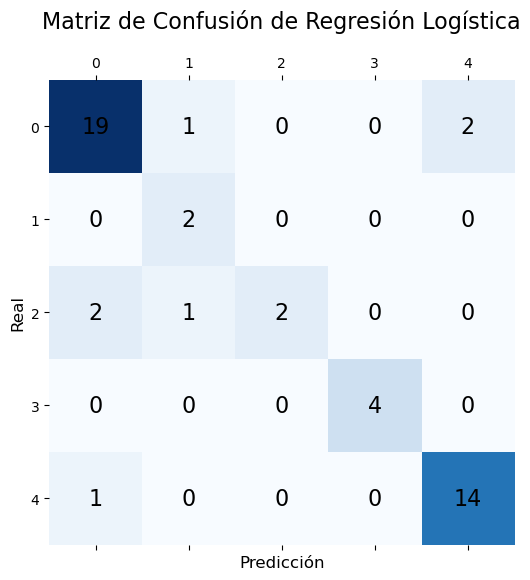

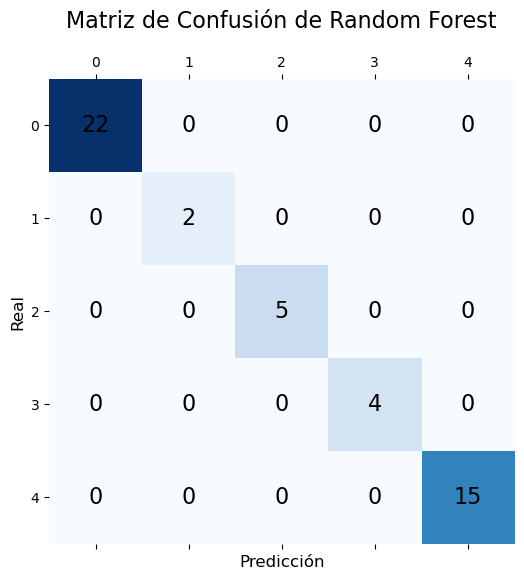

In [111]:
# Calcular la exactitud (accuracy) de ambos modelos
rf_accuracy = accuracy_score(y_val, rf_predictions)
lr_accuracy = accuracy_score(y_val, lr_predictions)

# Calcular la precisión de ambos modelos
rf_precision = precision_score(y_val, rf_predictions, average='weighted')
lr_precision = precision_score(y_val, lr_predictions, average='weighted')

# Calcular el F1-Score de ambos modelos
rf_f1 = f1_score(y_val, rf_predictions, average='weighted')
lr_f1 = f1_score(y_val, lr_predictions, average='weighted')



print("Random Forest - Conjunto de Validación")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"F1-Score: {rf_f1}")

print("Random Forest - Conjunto de Validación")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"F1-Score: {lr_f1}")

# Calcular la matriz de confusión para ambos modelos
rf_cm = confusion_matrix(y_val, rf_predictions)
lr_cm = confusion_matrix(y_val, lr_predictions)

# Graficar la matriz de confusión para Random Forest y Regresión Logística
plot_confusion_matrix(lr_cm, 'Regresión Logística')
plot_confusion_matrix(rf_cm, 'Random Forest')


In [106]:

# Definir el modelo base de Logistic Regression
lr_model = LogisticRegression(random_state=42, solver='liblinear')  # Usando 'liblinear' para permitir L1 y L2 penalización

# Definir los hiperparámetros a probar en Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Valores de regularización
    'penalty': ['l1', 'l2'],  # Penalización L1 (Lasso) o L2 (Ridge)
}

# Configurar GridSearchCV para optimizar por precision macro (promedio de precisión en todas las clases)
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='precision_macro', verbose=1)

# Entrenar el modelo utilizando GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print(f"Mejores hiperparámetros encontrados: {grid_search.best_params_}")

# Evaluar el modelo en el conjunto de validación
best_lr_model = grid_search.best_estimator_
lr_val_predictions = best_lr_model.predict(X_val)
lr_val_precision = precision_score(y_val, lr_val_predictions, average='weighted')

print(f"Accuracy de la mejor Logistic Regression en el conjunto de validación: {lr_val_precision}")
print("Parametros de la mejor regresión logística: ", best_lr_model.get_params())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros encontrados: {'C': 10, 'penalty': 'l1'}
Accuracy de la mejor Logistic Regression en el conjunto de validación: 0.907986111111111
Parametros de la mejor regresión logística:  {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-pa

In [119]:
# 1. Evaluar el Random Forest en el conjunto de prueba
rf_test_predictions = rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_precision = precision_score(y_test, rf_test_predictions, average='macro')
rf_test_f1 = f1_score(y_test, rf_test_predictions, average='macro')

print("Random Forest - Conjunto de Prueba")
print(f"Accuracy: {rf_test_accuracy}")
print(f"Precision: {rf_test_precision}")
print(f"F1-Score: {rf_test_f1}")

# 2. Evaluar el mejor modelo de Regresión Logística en el conjunto de prueba
lr_test_predictions = best_lr_model.predict(X_test)
lr_test_accuracy = accuracy_score(y_test, lr_test_predictions)
lr_test_precision = precision_score(y_test, lr_test_predictions, average='macro')
lr_test_f1 = f1_score(y_test, lr_test_predictions, average='macro')

print("\nLogistic Regression con Regularización - Conjunto de Prueba")
print(f"Accuracy: {lr_test_accuracy}")
print(f"Precision: {lr_test_precision}")
print(f"F1-Score: {lr_test_f1}")

Random Forest - Conjunto de Prueba
Accuracy: 1.0
Precision: 1.0
F1-Score: 1.0

Logistic Regression con Regularización - Conjunto de Prueba
Accuracy: 0.975
Precision: 0.9714285714285715
F1-Score: 0.9777188328912466


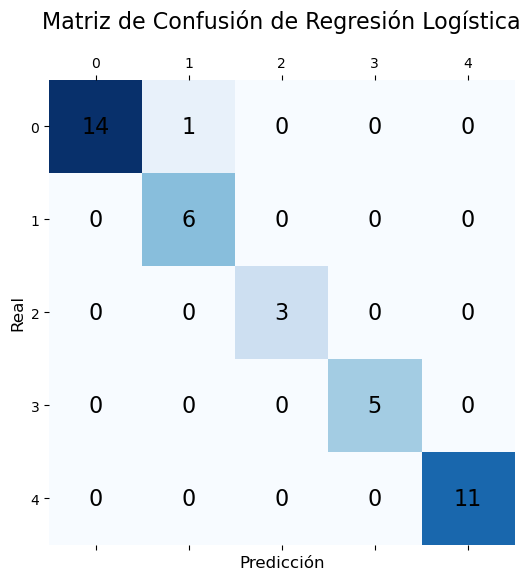

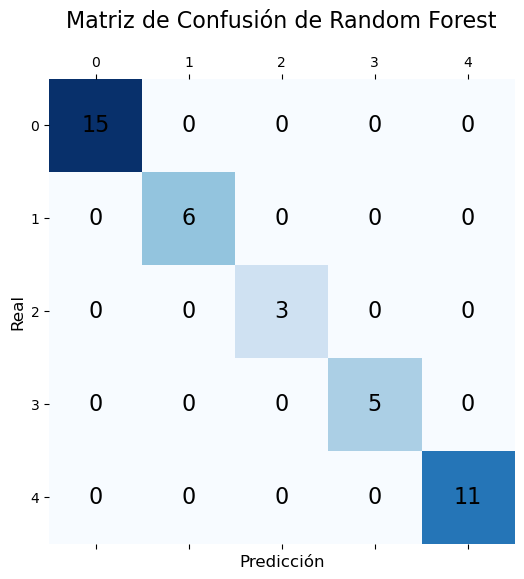

In [130]:
# Calcular la matriz de confusión para ambos modelos
rf_cm_test = confusion_matrix(y_test, rf_test_predictions)
lr_cm_test = confusion_matrix(y_test, lr_test_predictions)

# Graficar la matriz de confusión para Random Forest y Regresión Logística
plot_confusion_matrix(lr_cm_test, 'Regresión Logística')
plot_confusion_matrix(rf_cm_test, 'Random Forest')

In [108]:
# Crear un DataFrame con las etiquetas reales y las predicciones de ambos modelos
comparison_df = pd.DataFrame({
    'Etiqueta Real': y_test,
    'Predicción Random Forest': rf_test_predictions,
    'Predicción Logistic Regression': lr_test_predictions
})


In [128]:
comparison_df.to_csv('resultados.csv', index=False)